In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/MLA4H/project/notebook

/content/drive/My Drive/MLA4H/project_final/notebook


In [6]:
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read Raw CSV file

In [8]:
df = pd.read_csv('../data/raw_Ost_LabEvents.csv')

df.tail(5)

,subject_id,avg_UrineCreatinine1,avg_UrineCreatinine2,avg_UrineCreatinine3,avg_UrineCalcium,avg_ParathyroidHormone,gender,anchor_age,Osteoporosis
49742,19824731,NaN,45.000000,NaN,12.7,58.428571,F,66,0
49743,13543245,NaN,173.000000,NaN,NaN,NaN,F,91,0
49744,13774741,NaN,124.666667,NaN,NaN,NaN,F,91,0
49745,14476240,NaN,35.666667,NaN,NaN,NaN,F,64,0
49746,18539655,NaN,133.000000,NaN,NaN,NaN,M,69,0


# 2. Process data for plotting


In [9]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df = df.rename(columns={"avg_ParathyroidHormone": "PTH"})

In [10]:
df['avg_UrineCreatinine'] = df[['avg_UrineCreatinine1', 'avg_UrineCreatinine2', 'avg_UrineCreatinine3']].mean(axis=1, skipna=True)
df['CCR'] = np.where(df[['avg_UrineCalcium', 'avg_UrineCreatinine']].isna().any(axis=1), np.nan, df['avg_UrineCalcium'] / df['avg_UrineCreatinine'])

df0_temp = df.loc[df['Osteoporosis']==0,['PTH', 'CCR', 'Osteoporosis', 'gender', 'anchor_age']].dropna()
df1_temp = df.loc[df['Osteoporosis']==1,['PTH', 'CCR', 'Osteoporosis', 'gender', 'anchor_age']].dropna()
df0_temp = df0_temp.sample(df1_temp.shape[0])
print(df0_temp.shape, df1_temp.shape)

(313, 5) (313, 5)


In [11]:
df_plot = pd.concat([df0_temp, df1_temp], axis=0)

df_plot = df_plot[df_plot['PTH']<250]
df_plot = df_plot[df_plot['CCR']<0.7]

print(df_plot.shape)

(598, 5)


# 3. Kernel Density Plot

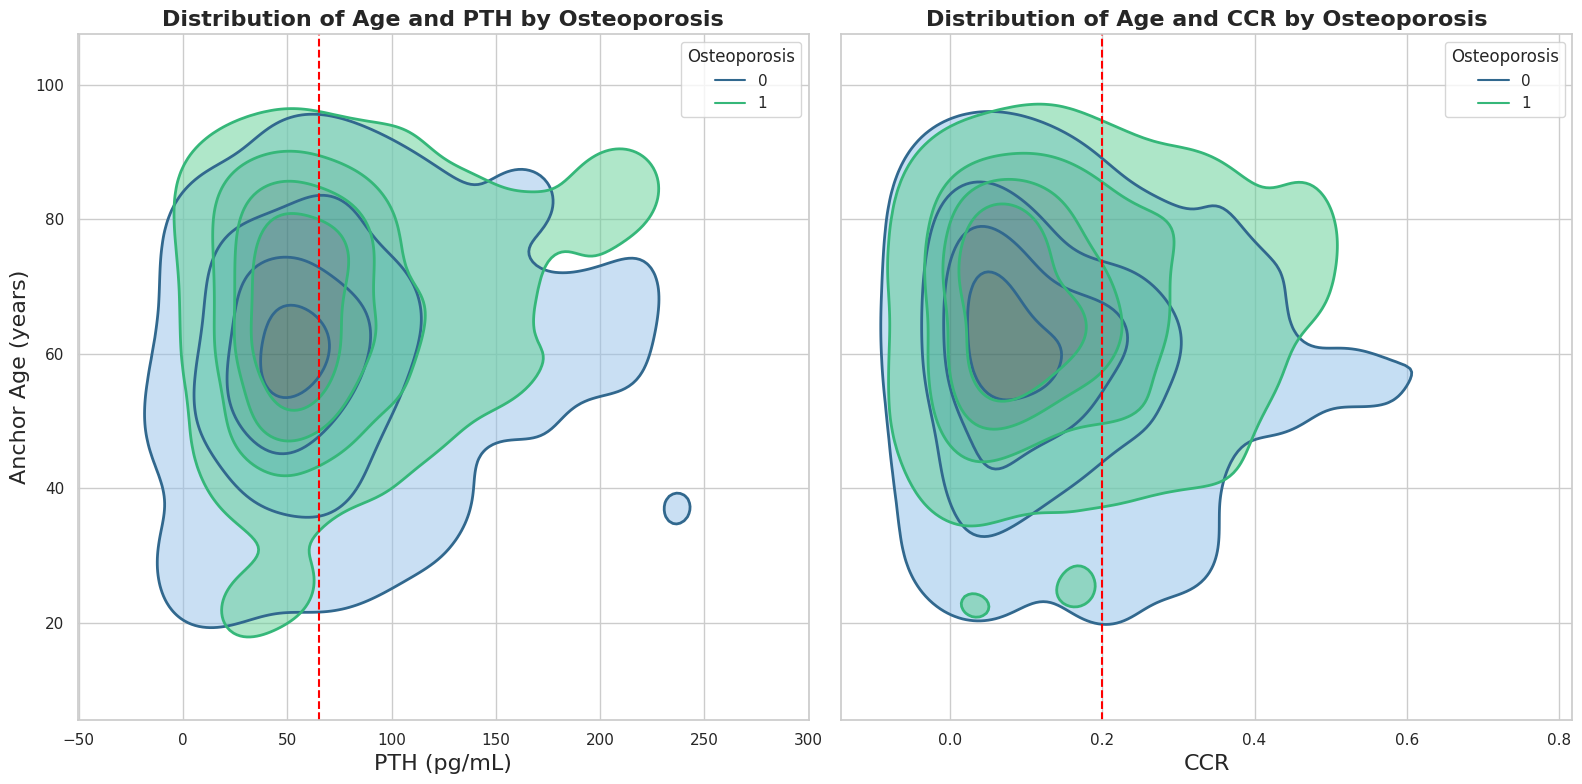

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with two axes side by side, sharing the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot filled contours on the first axis
sns.kdeplot(
    data=df_plot, y="anchor_age", x="PTH",
    hue="Osteoporosis", ax=ax1, palette="viridis", fill=True,
    alpha=0.5, levels=5
)
# Add line contours
sns.kdeplot(
    data=df_plot, y="anchor_age", x="PTH",
    hue="Osteoporosis", ax=ax1, palette="viridis", fill=False,
    linewidths=2, levels=5
)
ax1.grid(True)

ax1.axvline(x=65, color='red', linestyle='--', linewidth=1.5)
ax1.set_title("Distribution of Age and PTH by Osteoporosis", fontsize=16, fontweight='bold')
ax1.set_ylabel("Anchor Age (years)", fontsize=16)
ax1.set_xlabel("PTH (pg/mL)", fontsize=16)

# Plot filled contours on the second axis
sns.kdeplot(
    data=df_plot, y="anchor_age", x="CCR",
    hue="Osteoporosis", ax=ax2, palette="viridis", fill=True,
    alpha=0.5, levels=5
)
# Add line contours
sns.kdeplot(
    data=df_plot, y="anchor_age", x="CCR",
    hue="Osteoporosis", ax=ax2, palette="viridis", fill=False,
    linewidths=2, levels=5
)
ax2.grid(True)

ax2.axvline(x=0.2, color='red', linestyle='--', linewidth=1.5)
ax2.set_title("Distribution of Age and CCR by Osteoporosis", fontsize=16,
              fontweight='bold')
ax2.set_xlabel("CCR", fontsize=16)

# Adjust layout and display the final combined plot
plt.tight_layout()
plt.savefig("../plot/ost_kdeplot.png", dpi=300)

plt.show()


# 4. Violin Plot

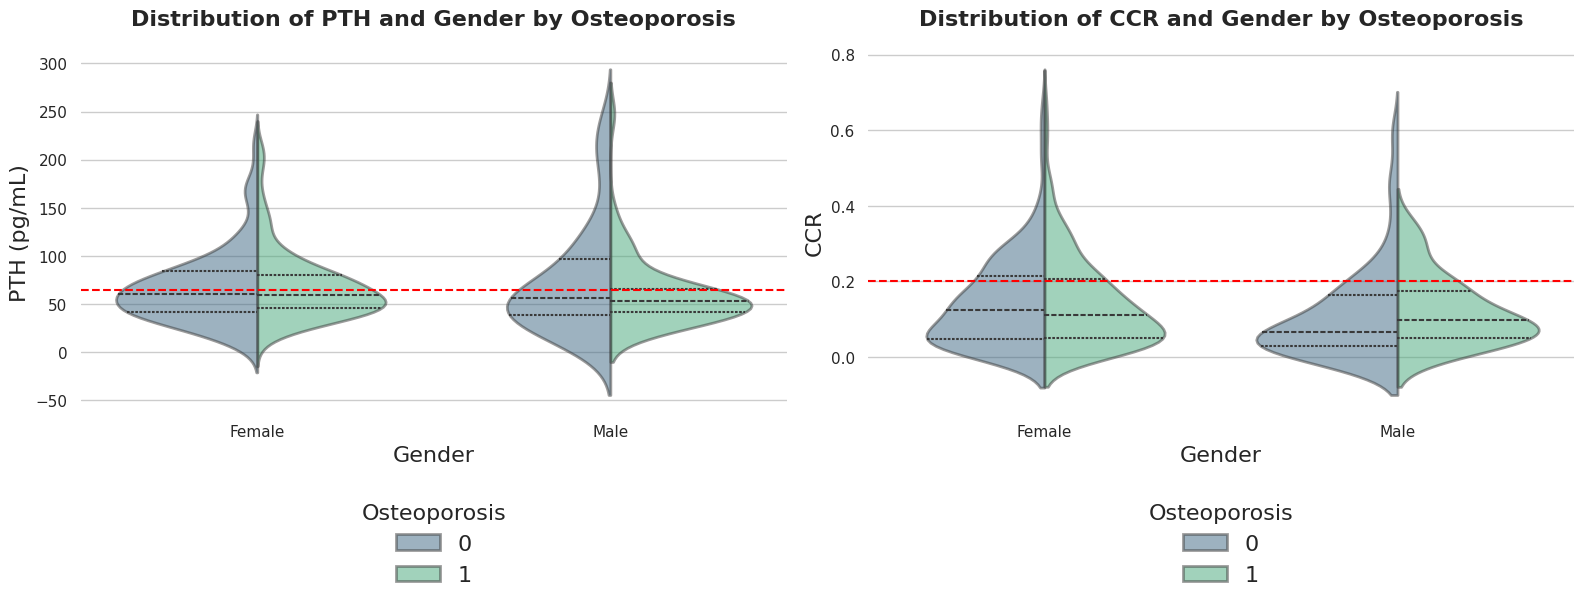

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for a clean academic look
sns.set_theme(style="whitegrid")

# Create a figure with two subplots side by side, sharing the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot the first violin plot for Osteoporosis on ax1
sns.violinplot(
    data=df_plot, x="gender", y="PTH", hue="Osteoporosis",
    split=True, inner="quartile", palette="viridis", linewidth=2,
    alpha=0.5, ax=ax1
)
ax1.set_title("Distribution of PTH and Gender by Osteoporosis", fontsize=16, pad=20,fontweight='bold')
ax1.set_xlabel("Gender", fontsize=16)
ax1.set_ylabel("PTH (pg/mL)", fontsize=16)
ax1.set_xticks([0, 1])  # Explicitly set the tick positions
ax1.set_xticklabels(["Female", "Male"])

# Customize the legend for the first plot and move it below the plot
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles=handles, labels=labels, title="Osteoporosis",
    loc="upper center", bbox_to_anchor=(0.5, -0.2), frameon=False, fontsize=16, title_fontsize=16
)
ax1.axhline(y=65, color='red', linestyle='--', linewidth=1.5)

# Plot the second violin plot for Osteoporosis on ax2
sns.violinplot(
    data=df_plot, x="gender", y="CCR", hue="Osteoporosis",
    split=True, inner="quartile", palette="viridis", linewidth=2,
    alpha=0.5, ax=ax2
)
ax2.set_title("Distribution of CCR and Gender by Osteoporosis", fontsize=16, pad=20,fontweight='bold')
ax2.set_xlabel("Gender", fontsize=16)
ax2.set_ylabel("CCR", fontsize=16)
ax2.set_xticks([0, 1])  # Explicitly set the tick positions
ax2.set_xticklabels(["Female", "Male"])

# Customize the legend for the second plot and move it below the plot
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(
    handles=handles, labels=labels, title="Osteoporosis",
    loc="upper center", bbox_to_anchor=(0.5, -0.2), frameon=False, fontsize=16, title_fontsize=16
)
ax2.axhline(y=0.2, color='red', linestyle='--', linewidth=1.5)

# Emphasize quartile lines for both plots
for ax in [ax1, ax2]:
    for line in ax.lines:
        line.set_linewidth(1.5)

# Remove excess gridlines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout with additional space at the bottom for legends
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Add space at the bottom for legends

# Save the improved combined plot
plt.savefig("../plot/ost_violinplot.png", dpi=300)

plt.show()
